In [715]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# for inline plots in jupyter
%matplotlib inline 

#removing warning messages CHECK THIS IF SOMETHING BREAKS!!!!!
pd.options.mode.chained_assignment = 'warn'  # default='warn'

data_path = "Marketing_Campaign_Train.csv"

data = pd.read_csv(data_path)

In [716]:
#Shape of data.csv we have 1680 rows and 29 columns
print("Shape: ", data.shape)

Shape:  (1680, 29)


In [717]:
data.info() #Seeing names of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     1680 non-null   int64  
 1   Year_Birth             1651 non-null   float64
 2   Education              1672 non-null   object 
 3   Status                 1646 non-null   object 
 4   Income                 1609 non-null   float64
 5   Num_of_kids            1672 non-null   float64
 6   Num_of_Teen            1660 non-null   float64
 7   Registration_date      1680 non-null   object 
 8   Recency                1680 non-null   int64  
 9   Mnt_Fruits             1673 non-null   float64
 10  Mnt_Meat               1673 non-null   float64
 11  Mnt_sweet              1659 non-null   float64
 12  Mnt_Wines              1673 non-null   float64
 13  Mnt_Gold_Products      1673 non-null   float64
 14  Mnt_Fish               1673 non-null   float64
 15  Num_

Here we see the types of all the data. As it says in the bottom line there are 64 float types, and 3 ints and objects.

Below this we have the describe function showing important information about the attributes

In [718]:
data.describe()

,ID,Year_Birth,Income,Num_of_kids,Num_of_Teen,Recency,Mnt_Fruits,Mnt_Meat,Mnt_sweet,Mnt_Wines,...,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response
count,1680.000000,1651.000000,1609.000000,1672.000000,1660.000000,1680.000000,1673.000000,1673.000000,1659.000000,1673.000000,...,1673.000000,1662.000000,1673.000000,1673.000000,1673.000000,1673.000000,1673.000000,1673.0,1673.0,1680.000000
mean,5584.735714,1969.047244,51983.554382,0.454545,0.503614,48.890476,303.676031,25.224148,166.232068,35.998207,...,10.602510,0.076414,0.071727,0.072325,0.065152,0.013748,0.008966,3.0,11.0,0.148214
std,3233.716033,11.937421,26567.679664,0.538492,0.544011,29.091872,340.672889,38.754356,227.583935,52.995401,...,5.030212,0.265739,0.258113,0.259103,0.246868,0.116477,0.094291,0.0,0.0,0.355418
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2862.500000,1959.500000,34596.000000,0.000000,0.000000,24.000000,23.000000,1.000000,15.500000,2.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5511.000000,1970.000000,50611.000000,0.000000,0.000000,50.000000,167.000000,8.000000,64.000000,12.000000,...,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8395.500000,1978.000000,67716.000000,1.000000,1.000000,74.000000,508.000000,30.000000,223.000000,47.000000,...,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,40.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [719]:
distrib = data.describe(include='all')
distrib.loc["median"] = data.median()
distrib.loc["skewness"] = data.skew()
distrib

C:\Users\obaro\AppData\Local\Temp\ipykernel_15888\885643443.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  distrib.loc["median"] = data.median()
C:\Users\obaro\AppData\Local\Temp\ipykernel_15888\885643443.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  distrib.loc["skewness"] = data.skew()


,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response
count,1680.000000,1651.000000,1672,1646,1609.000000,1672.000000,1660.000000,1680,1680.000000,1673.000000,...,1673.000000,1662.000000,1673.000000,1673.000000,1673.000000,1673.000000,1673.000000,1673.0,1673.0,1680.000000
unique,NaN,NaN,5,6,NaN,NaN,NaN,634,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Graduation,Married,NaN,NaN,NaN,14/02/2013,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,830,653,NaN,NaN,NaN,10,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5584.735714,1969.047244,NaN,NaN,51983.554382,0.454545,0.503614,NaN,48.890476,303.676031,...,10.602510,0.076414,0.071727,0.072325,0.065152,0.013748,0.008966,3.0,11.0,0.148214
std,3233.716033,11.937421,NaN,NaN,26567.679664,0.538492,0.544011,NaN,29.091872,340.672889,...,5.030212,0.265739,0.258113,0.259103,0.246868,0.116477,0.094291,0.0,0.0,0.355418
min,0.000000,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2862.500000,1959.500000,NaN,NaN,34596.000000,0.000000,0.000000,NaN,24.000000,23.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5511.000000,1970.000000,NaN,NaN,50611.000000,0.000000,0.000000,NaN,50.000000,167.000000,...,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8395.500000,1978.000000,NaN,NaN,67716.000000,1.000000,1.000000,NaN,74.000000,508.000000,...,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000


From the 75% row we see that the majority of people don't respond nor complain on campaigns.

The mean row shows that there is little response to all campaigns.

In [720]:
data.std(numeric_only=True).max() #This is the value of the income as can be seen in the table above

26567.67966434397

This means that there is a large gap between the smallest and largest incomes

Isolating numerical data

In [721]:
numeric_col = data.describe().columns # to get the numeric column
numeric_data = data[numeric_col] #getting the numeric columns
numeric_data.info() #checking we got the numeric columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     1680 non-null   int64  
 1   Year_Birth             1651 non-null   float64
 2   Income                 1609 non-null   float64
 3   Num_of_kids            1672 non-null   float64
 4   Num_of_Teen            1660 non-null   float64
 5   Recency                1680 non-null   int64  
 6   Mnt_Fruits             1673 non-null   float64
 7   Mnt_Meat               1673 non-null   float64
 8   Mnt_sweet              1659 non-null   float64
 9   Mnt_Wines              1673 non-null   float64
 10  Mnt_Gold_Products      1673 non-null   float64
 11  Mnt_Fish               1673 non-null   float64
 12  Num_Web_Purchases      1651 non-null   float64
 13  Num_Store_Purchases    1673 non-null   float64
 14  Num_Deals_Purchases    1673 non-null   float64
 15  Num_

In [722]:
nominal_data = data.drop(numeric_col, axis=1) #removing the numeric columns gives us the remaining columns
culledData = numeric_data.drop(['ID','Revenue','Cost_Contact'], axis=1)

In [723]:
distrib = culledData.describe(include='all')
distrib.loc["median"] = culledData.median()
distrib.loc["skewness"] = culledData.skew()
distrib

,Year_Birth,Income,Num_of_kids,Num_of_Teen,Recency,Mnt_Fruits,Mnt_Meat,Mnt_sweet,Mnt_Wines,Mnt_Gold_Products,...,Num_Deals_Purchases,Num_Catalog_Purchases,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Response
count,1651.000000,1609.000000,1672.000000,1660.000000,1680.000000,1673.000000,1673.000000,1659.000000,1673.000000,1673.000000,...,1673.000000,1673.000000,1673.000000,1662.000000,1673.000000,1673.000000,1673.000000,1673.000000,1673.000000,1680.000000
mean,1969.047244,51983.554382,0.454545,0.503614,48.890476,303.676031,25.224148,166.232068,35.998207,26.200239,...,2.650329,5.736402,10.602510,0.076414,0.071727,0.072325,0.065152,0.013748,0.008966,0.148214
std,11.937421,26567.679664,0.538492,0.544011,29.091872,340.672889,38.754356,227.583935,52.995401,40.894498,...,3.022488,3.225084,5.030212,0.265739,0.258113,0.259103,0.246868,0.116477,0.094291,0.355418
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.500000,34596.000000,0.000000,0.000000,24.000000,23.000000,1.000000,15.500000,2.000000,1.000000,...,0.000000,3.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,50611.000000,0.000000,0.000000,50.000000,167.000000,8.000000,64.000000,12.000000,8.000000,...,2.000000,5.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1978.000000,67716.000000,1.000000,1.000000,74.000000,508.000000,30.000000,223.000000,47.000000,32.000000,...,4.000000,8.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,28.000000,13.000000,40.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
median,1970.000000,50611.000000,0.000000,0.000000,50.000000,167.000000,8.000000,64.000000,12.000000,8.000000,...,2.000000,5.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
skewness,-0.352130,7.916831,0.584131,0.412991,-0.012308,1.182911,2.149518,2.109214,1.988343,2.218833,...,2.065762,0.699794,0.259664,3.191823,3.322458,3.305147,3.527126,8.359327,10.427719,1.981920


In [724]:
for col in culledData:
    print(col, ' skew:', culledData[col].skew(axis = 0, skipna = True) )

Year_Birth  skew: -0.3521297334201921
Income  skew: 7.916831486203255
Num_of_kids  skew: 0.5841313250351708
Num_of_Teen  skew: 0.4129909449000085
Recency  skew: -0.012307768420328446
Mnt_Fruits  skew: 1.1829109635956956
Mnt_Meat  skew: 2.1495184429670813
Mnt_sweet  skew: 2.1092143754162325
Mnt_Wines  skew: 1.988342728206097
Mnt_Gold_Products  skew: 2.218833414968302
Mnt_Fish  skew: 1.9402486173238092
Num_Web_Purchases  skew: 2.5125546694750898
Num_Store_Purchases  skew: 1.5552728492914274
Num_Deals_Purchases  skew: 2.0657617307381693
Num_Catalog_Purchases  skew: 0.6997937661170338
Num_Web_Visits  skew: 0.25966407514401624
Response_Campaign_1  skew: 3.191823311903448
Response_Campaign_2  skew: 3.3224579772122715
Response_Campaign_3  skew: 3.305146751217529
Response_Campaign_4  skew: 3.5271264290087347
Response_Campaign_5  skew: 8.359327109203887
Complain  skew: 10.427719201596041
Response  skew: 1.9819195359175958


High skew values in Complain, Income, and Response_Campaign_5

The skewness increases with the campaign number. As such, we surmise that future campaigns are less fruitful.

Income also had a high std value. We should normalize the income to smaller numbers

d:\Documents\University\Year_4\2nd Semester\Data mining\datamine\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


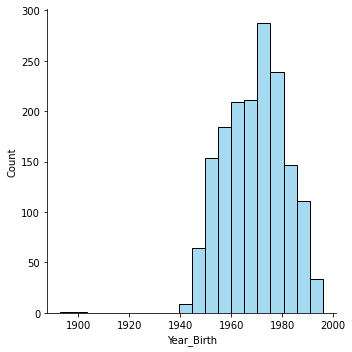

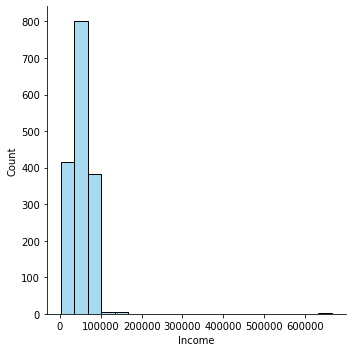

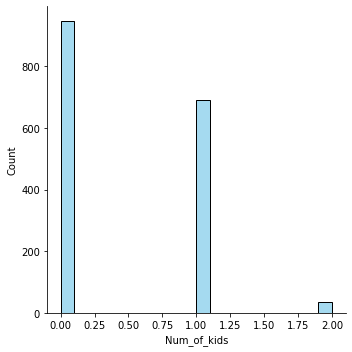

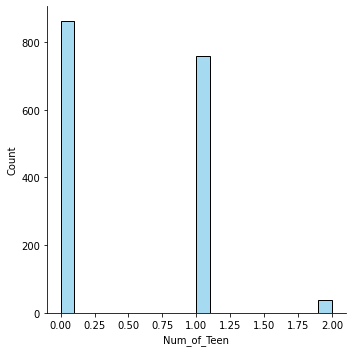

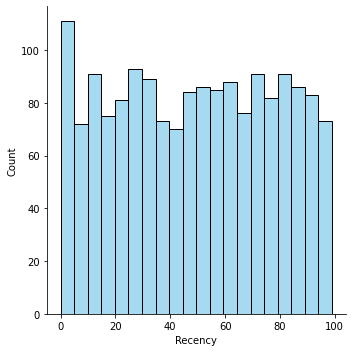

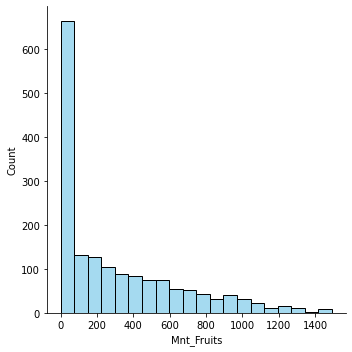

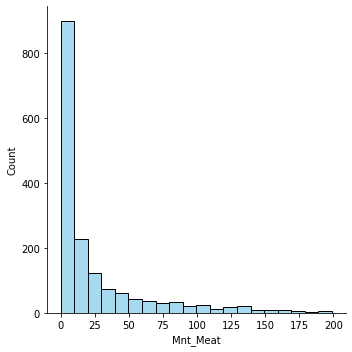

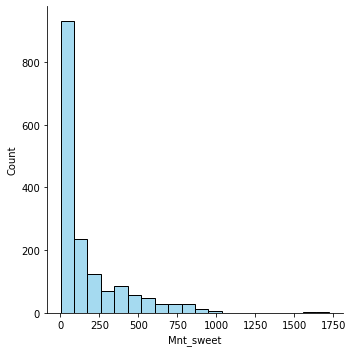

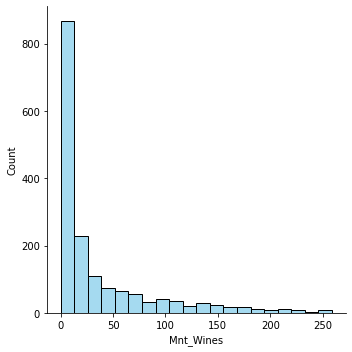

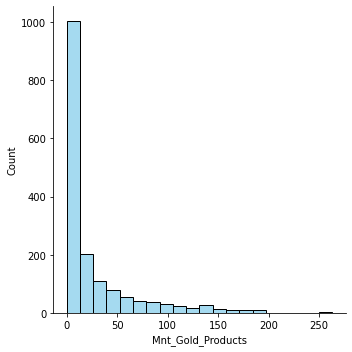

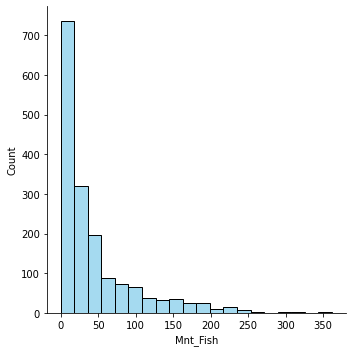

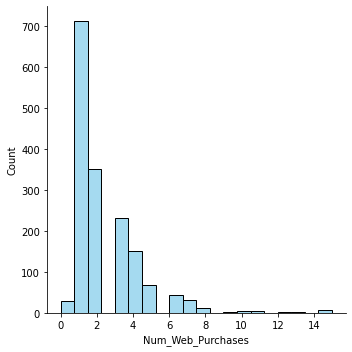

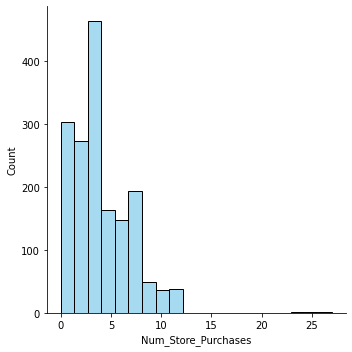

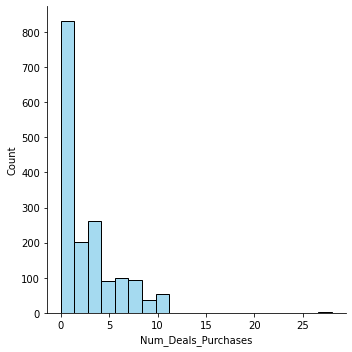

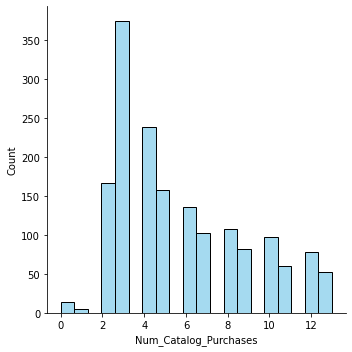

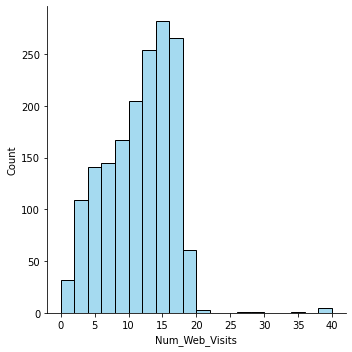

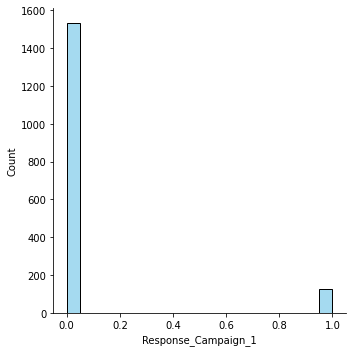

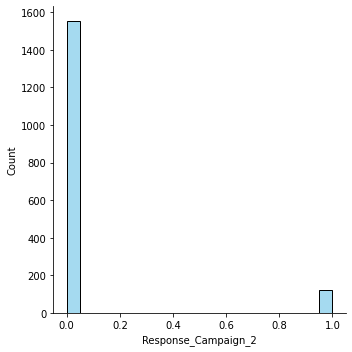

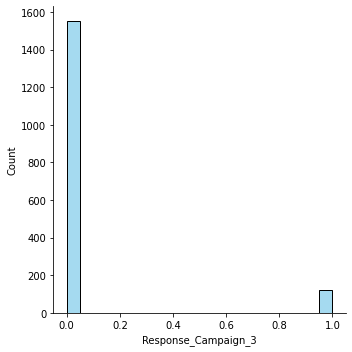

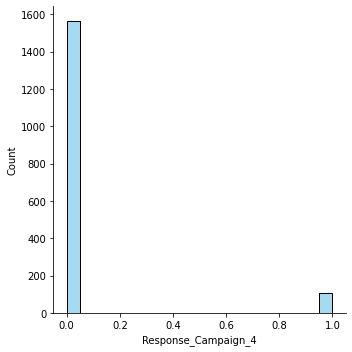

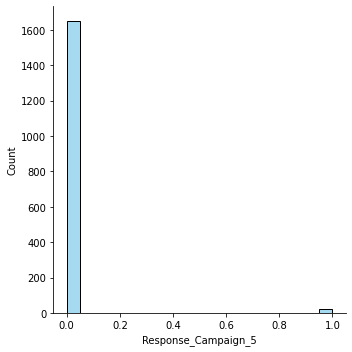

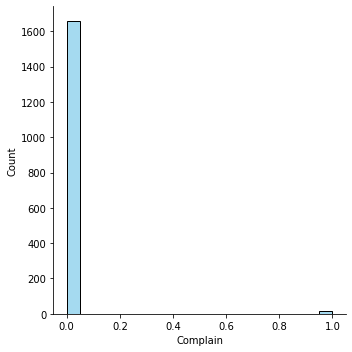

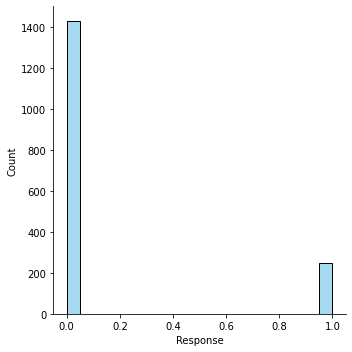

In [725]:
for col in culledData:
    sns.displot(culledData[col], bins=20, color='skyblue') 

Next, we want to show the correlation between each of the factors to the response rate. (Speaking only of the relevant columns in the culled data)

The correlation with reposne to campaign 3 is the highest at 0.331.

In [726]:
maxft = ""
maxcr = 0
correlationData = culledData.drop(['Response'],axis=1)
for feature in correlationData.keys():
    print(feature,": ")
    cor = culledData[feature].corr(culledData['Response'])
    if cor > maxcr:
        maxft = feature
        maxcr = cor
    print(cor)
print("\nFeature with max correlation:", maxft,"\nwith correlation:", maxcr)

Year_Birth : 
0.011222672017971023
Income : 
0.12244093070982832
Num_of_kids : 
-0.07416822093010508
Num_of_Teen : 
-0.14571996960476738
Recency : 
-0.21121117731714004
Mnt_Fruits : 
0.24153990883176757
Mnt_Meat : 
0.11869099291445442
Mnt_sweet : 
0.2399923826705639
Mnt_Wines : 
0.10807390928982613
Mnt_Gold_Products : 
0.11974841289590478
Mnt_Fish : 
0.1435237547947385
Num_Web_Purchases : 
0.008914375986854945
Num_Store_Purchases : 
0.1433686454355458
Num_Deals_Purchases : 
0.20568012115043685
Num_Catalog_Purchases : 
0.03679256807591038
Num_Web_Visits : 
-0.014368479691074241
Response_Campaign_1 : 
0.24275416628949514
Response_Campaign_2 : 
0.15710855052203718
Response_Campaign_3 : 
0.3305952036650099
Response_Campaign_4 : 
0.27747599892046004
Response_Campaign_5 : 
0.1525422010758554
Complain : 
-0.021958167828478033

Feature with max correlation: Response_Campaign_3 
with correlation: 0.3305952036650099


From the correlation data it can be inferred that the things with the strongest effect on the response of client to the last campaign are:

The third campaign, fourth campaign, campain 1 with the amount of fruits, and lastly the amount of sweets.

Meanwhile we notice that recency has a strong backwards correlation with the response. Meaning the more time that passes from the last purchase the chance for a new purchase is less likely.

Below we show using the jinja2 library the correlation between all features (we made this before it was shown in the TA lesson, and chose to stay with what we had)

In [727]:
corr = culledData.corr()
corr.style.background_gradient(cmap="coolwarm").set_precision(2)

C:\Users\obaro\AppData\Local\Temp\ipykernel_15888\428449287.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap="coolwarm").set_precision(2)


,Year_Birth,Income,Num_of_kids,Num_of_Teen,Recency,Mnt_Fruits,Mnt_Meat,Mnt_sweet,Mnt_Wines,Mnt_Gold_Products,Mnt_Fish,Num_Web_Purchases,Num_Store_Purchases,Num_Deals_Purchases,Num_Catalog_Purchases,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Response
Year_Birth,1.00,-0.15,0.23,-0.38,-0.02,-0.15,-0.02,-0.02,-0.03,-0.02,-0.07,-0.07,-0.15,-0.11,-0.10,0.06,0.06,-0.06,-0.01,-0.01,-0.01,-0.03,0.01
Income,-0.15,1.00,-0.40,0.03,-0.00,0.55,0.40,0.57,0.41,0.41,0.30,-0.05,0.35,0.58,0.50,-0.50,-0.00,0.18,0.31,0.25,0.08,-0.01,0.12
Num_of_kids,0.23,-0.40,1.00,-0.04,0.02,-0.49,-0.37,-0.43,-0.38,-0.37,-0.35,0.20,-0.36,-0.50,-0.50,0.42,0.00,-0.16,-0.20,-0.16,-0.08,0.01,-0.07
Num_of_Teen,-0.38,0.03,-0.04,1.00,0.02,0.03,-0.16,-0.26,-0.19,-0.16,-0.00,0.39,0.17,-0.09,0.07,0.14,-0.03,0.06,-0.18,-0.11,0.00,0.03,-0.15
Recency,-0.02,-0.00,0.02,0.02,1.00,0.03,0.01,0.04,-0.00,0.02,0.04,0.01,-0.02,0.03,0.01,-0.02,-0.05,0.02,0.00,-0.04,-0.01,0.01,-0.21
Mnt_Fruits,-0.15,0.55,-0.49,0.03,0.03,1.00,0.38,0.56,0.39,0.37,0.39,0.04,0.54,0.62,0.64,-0.30,0.08,0.39,0.49,0.37,0.22,-0.03,0.24
Mnt_Meat,-0.02,0.40,-0.37,-0.16,0.01,0.38,1.00,0.56,0.57,0.56,0.37,-0.14,0.28,0.47,0.45,-0.41,0.01,0.01,0.21,0.18,-0.01,0.00,0.12
Mnt_sweet,-0.02,0.57,-0.43,-0.26,0.04,0.56,0.56,1.00,0.56,0.52,0.34,-0.09,0.28,0.75,0.46,-0.53,0.02,0.08,0.38,0.30,0.03,-0.01,0.24
Mnt_Wines,-0.03,0.41,-0.38,-0.19,-0.00,0.39,0.57,0.56,1.00,0.57,0.41,-0.13,0.28,0.51,0.45,-0.43,0.00,0.01,0.20,0.24,-0.00,-0.02,0.11
Mnt_Gold_Products,-0.02,0.41,-0.37,-0.16,0.02,0.37,0.56,0.52,0.57,1.00,0.37,-0.12,0.35,0.47,0.44,-0.40,0.01,0.03,0.27,0.22,0.00,-0.02,0.12


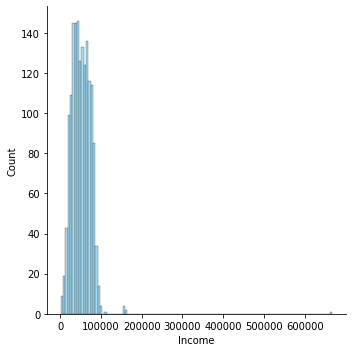

In [728]:
target =pd.DataFrame(data['Income'])
sns.displot(target, x='Income', color='skyblue', discrete=False)

Above we see that there are a few outliers with very high income. We saw this in the skew as well.

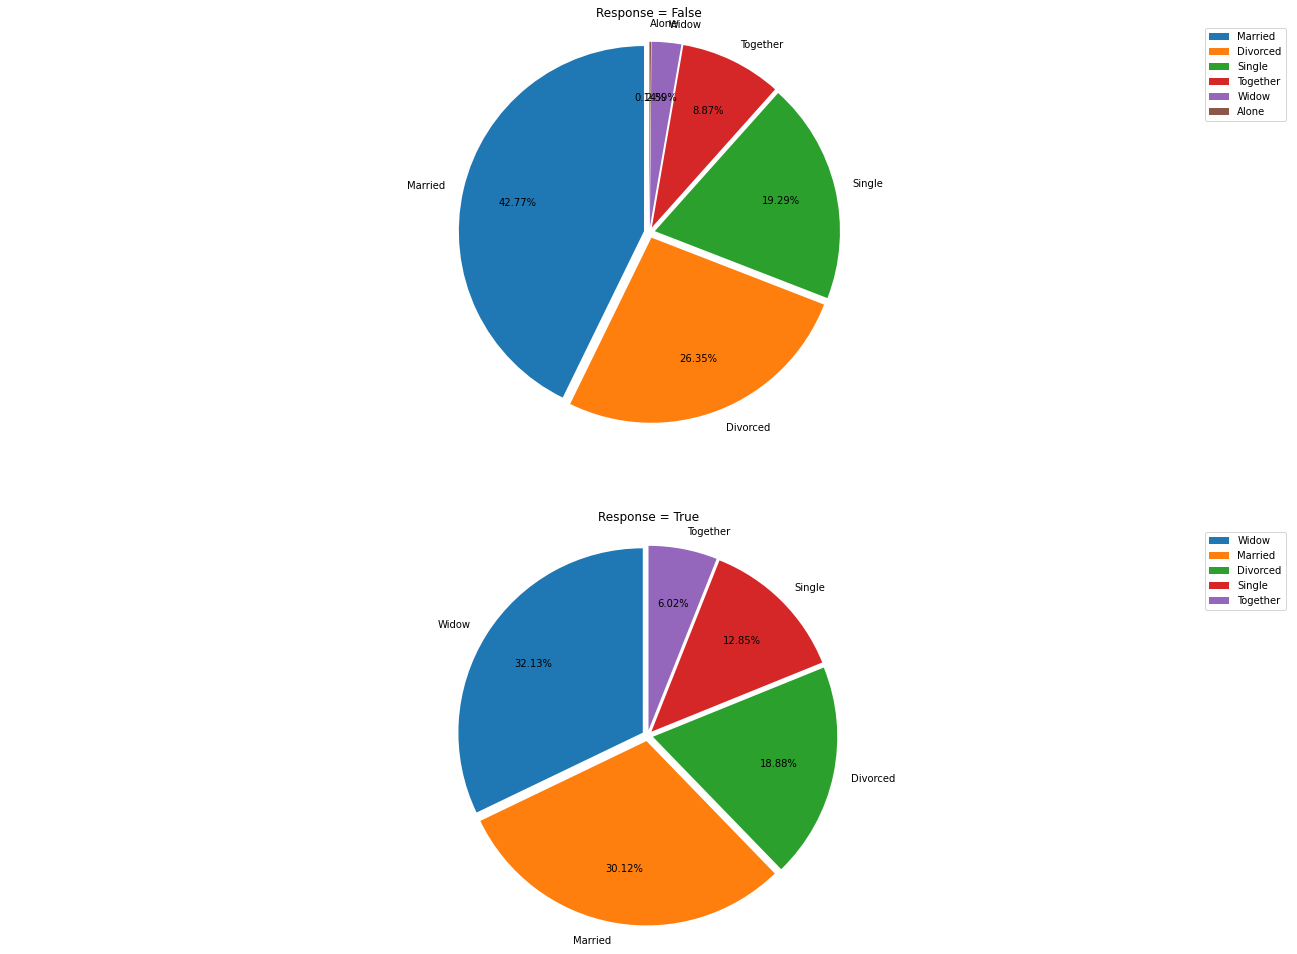

In [729]:
data['Status'] = data['Status'].fillna("Married") #married are the majority so we assume the Nan are married as well
target = data['Status'].unique()


fig1,(ax1,ax2) = plt.subplots(2,1,figsize=(23,17))
ax1.pie(data['Status'][data['Response']==False].value_counts(), labels=target, labeldistance=1.1, pctdistance=0.7, autopct='%0.2f%%', shadow=False, startangle=90,explode=[0.03,0.03,0.03,0.03,0.03,0.03])
ax1.axis('equal') 
ax1.set_title('Response = False')
fig1.set_facecolor('white')
target = data['Status'][data['Response']==True].unique()
ax2.pie(data['Status'][data['Response']==True].value_counts(), labels=target, labeldistance=1.1, pctdistance=0.7, autopct='%0.2f%%', shadow=False, startangle=90,explode=[0.03,0.03,0.03,0.03,0.03])
ax2.axis('equal')
ax2.set_title('Response = True')
ax1.legend()
ax2.legend()
plt.show()

Notice there are no Single people who responeded to the campaigns

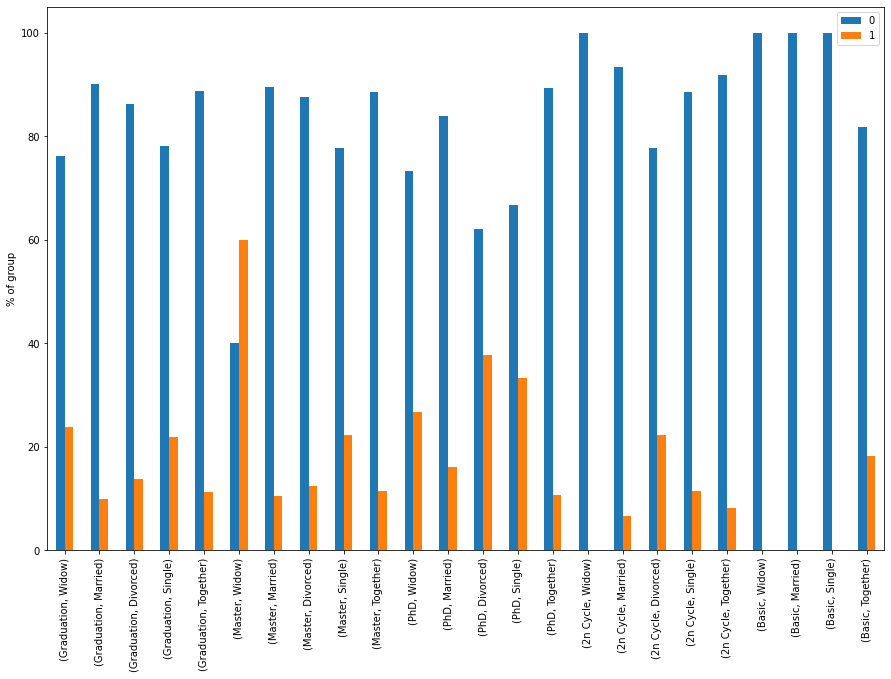

In [730]:
labelSet1 = data['Education'][data['Response']==True].unique()
labelSet2 = data['Status'][data['Response']==True].unique()

responsePrecentage = {}
for i,label1 in enumerate(labelSet1):
    for j,label2 in enumerate(labelSet2):
        responsePrecentage[(label1,label2)] = data['Response'][data['Education']==label1][data['Status']==label2].value_counts(normalize=True)*100
plot = pd.DataFrame.from_dict(responsePrecentage,orient='index').plot(kind='bar',figsize=(15,10),ylabel='% of group') #show how many there are


The group with the highest response rate are widows with master degress

Cleaning the data

Notice in status that alone and single are the same. Since there are very few Alone compared to Single we will turn them into it.

In [731]:
cleanData = data #using a copy of data to not harm the original
cleanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     1680 non-null   int64  
 1   Year_Birth             1651 non-null   float64
 2   Education              1672 non-null   object 
 3   Status                 1680 non-null   object 
 4   Income                 1609 non-null   float64
 5   Num_of_kids            1672 non-null   float64
 6   Num_of_Teen            1660 non-null   float64
 7   Registration_date      1680 non-null   object 
 8   Recency                1680 non-null   int64  
 9   Mnt_Fruits             1673 non-null   float64
 10  Mnt_Meat               1673 non-null   float64
 11  Mnt_sweet              1659 non-null   float64
 12  Mnt_Wines              1673 non-null   float64
 13  Mnt_Gold_Products      1673 non-null   float64
 14  Mnt_Fish               1673 non-null   float64
 15  Num_

Notice a lot of attributes have less than 1680 in the nonNull count. We need to turn the null to the most common option.

To do so we'll find the most common through histograms and mode:

Graduation    0.494048
Name: Education, dtype: float64
0.0    0.56369
Name: Num_of_kids, dtype: float64
0.0    0.513095
Name: Num_of_Teen, dtype: float64
2.0    0.020238
Name: Mnt_Fruits, dtype: float64
0.0    0.183929
Name: Mnt_Meat, dtype: float64
0.0    0.172024
Name: Mnt_Wines, dtype: float64
0.0    0.192857
Name: Mnt_Gold_Products, dtype: float64
1.0    0.034524
Name: Mnt_Fish, dtype: float64
2.0    0.1625
Name: Num_Store_Purchases, dtype: float64
0.0    0.271429
Name: Num_Deals_Purchases, dtype: float64
3.0    0.222619
Name: Num_Catalog_Purchases, dtype: float64
14.0    0.167857
Name: Num_Web_Visits, dtype: float64
0.0    0.91369
Name: Response_Campaign_1, dtype: float64
0.0    0.924405
Name: Response_Campaign_2, dtype: float64
0.0    0.92381
Name: Response_Campaign_3, dtype: float64
0.0    0.930952
Name: Response_Campaign_4, dtype: float64
0.0    0.982143
Name: Response_Campaign_5, dtype: float64
0.0    0.986905
Name: Complain, dtype: float64
3.0    0.995833
Name: Cost_Contact, 

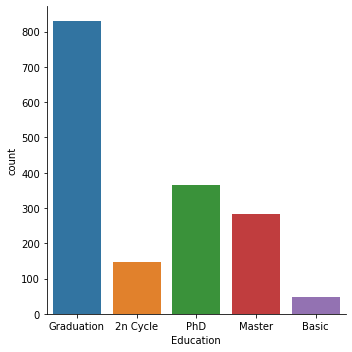

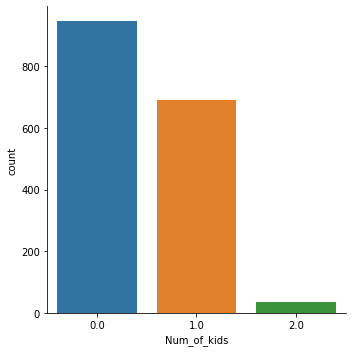

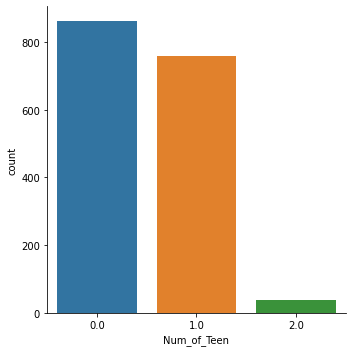

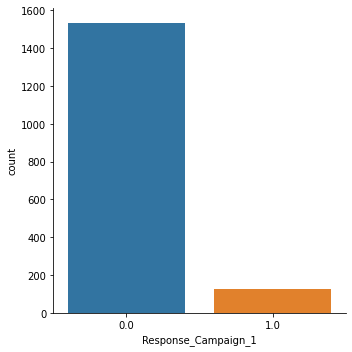

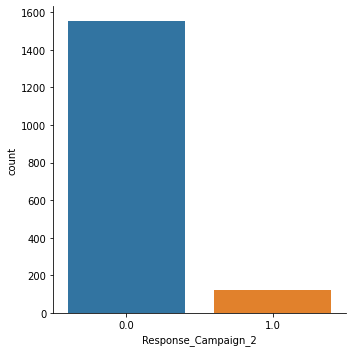

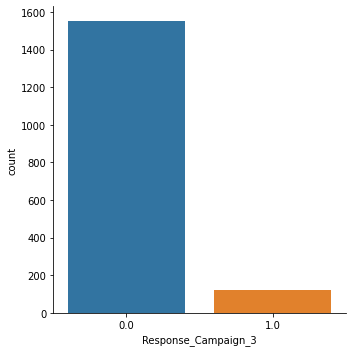

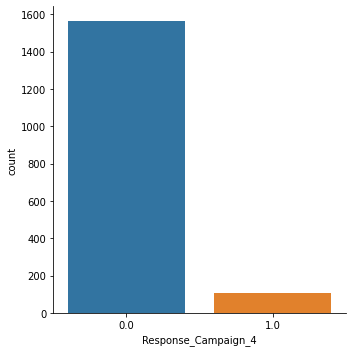

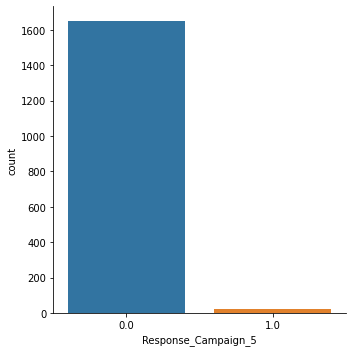

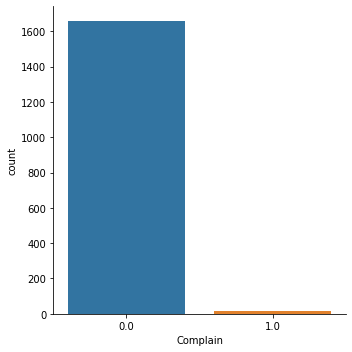

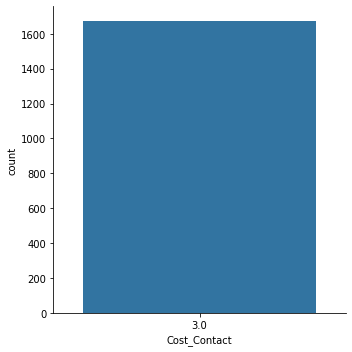

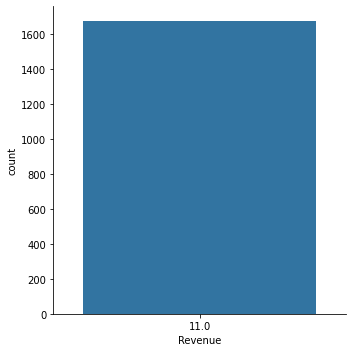

In [732]:
for col in ['Education','Num_of_kids','Num_of_Teen','Mnt_Fruits','Mnt_Meat','Mnt_Wines','Mnt_Gold_Products','Mnt_Fish','Num_Store_Purchases','Num_Deals_Purchases','Num_Catalog_Purchases','Num_Web_Visits','Response_Campaign_1','Response_Campaign_2','Response_Campaign_3','Response_Campaign_4','Response_Campaign_5','Complain','Cost_Contact','Revenue']:
    if cleanData[col].unique().size<=10: #skip drawing the catplot for the Mnt attributes as it is too messy to learn from
        sns.catplot(x = col, kind = 'count', data = cleanData)
    print(cleanData[col].value_counts()[cleanData[col].mode()]/cleanData.shape[0])

Find if there are rows with too much missing data (Checking for rows that are missing more than half)

In [733]:
cleanData[cleanData.isnull().sum(axis=1)>15]

,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response
1659,1419,1950.0,Graduation,Together,34026.0,1.0,1.0,05/08/2013,11,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1662,9284,1958.0,Graduation,Together,53977.0,0.0,1.0,08/06/2013,21,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1663,3673,1971.0,Graduation,Single,55239.0,0.0,1.0,14/07/2013,59,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1665,10983,1952.0,Graduation,Together,75278.0,0.0,0.0,29/01/2013,17,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1666,2611,1959.0,Master,Together,82576.0,0.0,0.0,01/08/2012,66,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1673,979,1975.0,Graduation,Single,33249.0,1.0,0.0,20/02/2013,11,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1675,8278,1990.0,PhD,Married,74214.0,0.0,0.0,26/08/2012,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


We'll drop these 7 rows as it's a small amount and they don't have much data to give

In [734]:
cleanData = cleanData.drop([1659,1662,1663,1665,1666,1673,1675])
cleanData[cleanData.isnull().sum(axis=1)>15]

,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response


Fill rows missing an attribute with a clear most common with said most common value

In [735]:
for col in ['Response_Campaign_1','Response_Campaign_2','Response_Campaign_3','Response_Campaign_4','Response_Campaign_5','Complain','Cost_Contact','Revenue']:
    cleanData[col] = cleanData[col].fillna(cleanData[col].mode()[0])

In [736]:
cleanData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1673 entries, 0 to 1679
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     1673 non-null   int64  
 1   Year_Birth             1644 non-null   float64
 2   Education              1665 non-null   object 
 3   Status                 1673 non-null   object 
 4   Income                 1602 non-null   float64
 5   Num_of_kids            1665 non-null   float64
 6   Num_of_Teen            1653 non-null   float64
 7   Registration_date      1673 non-null   object 
 8   Recency                1673 non-null   int64  
 9   Mnt_Fruits             1673 non-null   float64
 10  Mnt_Meat               1673 non-null   float64
 11  Mnt_sweet              1659 non-null   float64
 12  Mnt_Wines              1673 non-null   float64
 13  Mnt_Gold_Products      1673 non-null   float64
 14  Mnt_Fish               1673 non-null   float64
 15  Num_

Remaining attributes to fix: Income,Num_Web_Purchases, Num_of_Teen, Mnt_Sweet, Num_of_kids, Education, Year_Birth

We'll start with Income becuase it's has the most missing
Like we wrote earlier we're going to normalize Income. possibly remove the outliers

In [737]:
cleanData[cleanData['Income'].isnull()]

,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response
0,5376,1979.0,Graduation,Married,NaN,1.0,0.0,06/01/2013,42,1.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0
10,2408,1976.0,Graduation,Married,NaN,1.0,1.0,20/11/2012,20,490.0,...,14.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0
93,2863,1970.0,Graduation,Single,NaN,1.0,2.0,23/08/2013,67,738.0,...,14.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,11.0,0
142,5909,1964.0,Graduation,Married,NaN,0.0,1.0,19/09/2013,25,895.0,...,16.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0
297,5370,1973.0,PhD,Married,NaN,1.0,0.0,16/01/2013,38,239.0,...,16.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,2471,1965.0,Graduation,Married,NaN,0.0,0.0,27/06/2014,39,48.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0
1562,3749,1973.0,Graduation,Together,NaN,0.0,0.0,02/03/2013,54,627.0,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0
1639,7627,NaN,NaN,Married,NaN,NaN,NaN,12/12/2012,25,817.0,...,4.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,11.0,1
1649,5255,1986.0,Graduation,Single,NaN,1.0,0.0,20/02/2013,19,5.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0


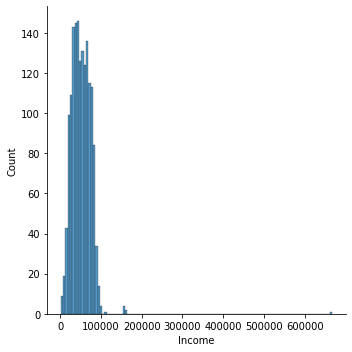

In [738]:
sns.displot(cleanData['Income'])

normalizing Income

0         NaN
1   -1.889166
2   -1.652276
3    0.577494
4    4.094136
Name: Inc_norm, dtype: float64


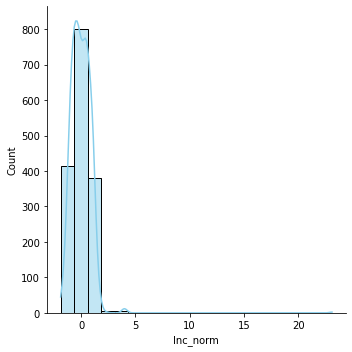

In [739]:
z_scaler = StandardScaler()
z_scaler.fit(pd.DataFrame(cleanData['Income']))
cleanData['Inc_norm'] = z_scaler.transform(pd.DataFrame(cleanData['Income']))
print(cleanData['Inc_norm'].head())
sns.displot(cleanData['Inc_norm'], bins=20, kde=True, color='skyblue')

In [740]:
dt = cleanData['Income']
data_mean, data_std = np.mean(dt), np.std(dt)
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
cleanData.loc[(cleanData['Income'] > upper) | (cleanData['Income'] < lower)]

,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response,Inc_norm
4,1501,1982.0,PhD,Married,160803.0,0.0,0.0,04/08/2012,21,55.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,4.094136
5,8475,1973.0,PhD,Married,157243.0,0.0,1.0,01/03/2014,98,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,3.960232
276,9432,1977.0,Graduation,Together,666666.0,1.0,0.0,02/06/2013,23,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,23.121447
1628,5555,1975.0,Graduation,Divorced,153924.0,0.0,0.0,07/02/2014,81,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,3.835393
1636,11181,1949.0,PhD,Married,156924.0,0.0,0.0,29/08/2013,85,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,3.948233
1645,1503,1976.0,PhD,Together,162397.0,1.0,1.0,03/06/2013,31,85.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,4.154092
1646,4931,1977.0,Graduation,Together,157146.0,0.0,0.0,29/04/2013,13,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,3.956583


Since it's only 7 rows we can remove them

In [741]:
cleanData = cleanData.drop([4,5,276,1628,1636,1645,1646])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
cleanData.loc[(cleanData['Income'] > upper) | (cleanData['Income'] < lower)]


,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response,Inc_norm


0         NaN
1   -2.384227
2   -2.080515
3    0.778229
6   -2.273650
Name: Inc_norm, dtype: float64


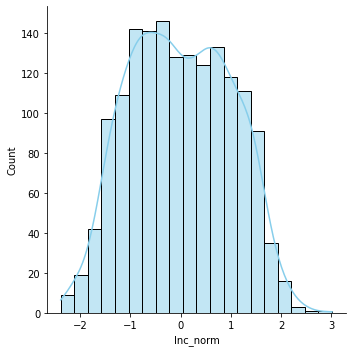

In [742]:
z_scaler = StandardScaler()
z_scaler.fit(pd.DataFrame(cleanData['Income']))
cleanData['Inc_norm'] = z_scaler.transform(pd.DataFrame(cleanData['Income']))
print(cleanData['Inc_norm'].head())
sns.displot(cleanData['Inc_norm'], bins=20, kde=True, color='skyblue')

Trying min max as well

In [743]:
scaler = MinMaxScaler()
scaler.fit(pd.DataFrame(cleanData['Income']))
cleanData['Income_min_max'] = scaler.transform(pd.DataFrame(cleanData['Income']))
print(scaler.data_min_)
print(scaler.data_max_)
cleanData[['Income','Income_min_max']].head()

[1730.]
[113734.]


,Income,Income_min_max
0,NaN,NaN
1,1730.0,0.000000
2,8028.0,0.056230
3,67309.0,0.585506
6,4023.0,0.020472


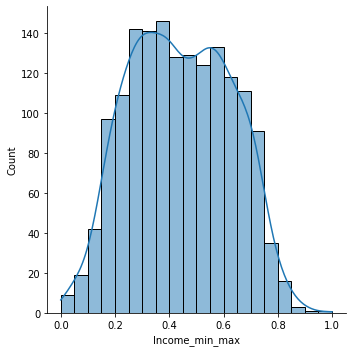

In [744]:
sns.displot(cleanData['Income_min_max'],kde=True)

Now we'll change the NaN values. Since there are alot of them and the distribution looks normal we'll use it to fill in the Nan values

In [745]:
cleanData[cleanData['Income'].isnull()]

,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response,Inc_norm,Income_min_max
0,5376,1979.0,Graduation,Married,NaN,1.0,0.0,06/01/2013,42,1.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,NaN,NaN
10,2408,1976.0,Graduation,Married,NaN,1.0,1.0,20/11/2012,20,490.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,NaN,NaN
93,2863,1970.0,Graduation,Single,NaN,1.0,2.0,23/08/2013,67,738.0,...,1.0,0.0,1.0,0.0,0.0,3.0,11.0,0,NaN,NaN
142,5909,1964.0,Graduation,Married,NaN,0.0,1.0,19/09/2013,25,895.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,NaN,NaN
297,5370,1973.0,PhD,Married,NaN,1.0,0.0,16/01/2013,38,239.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,2471,1965.0,Graduation,Married,NaN,0.0,0.0,27/06/2014,39,48.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,NaN,NaN
1562,3749,1973.0,Graduation,Together,NaN,0.0,0.0,02/03/2013,54,627.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,NaN,NaN
1639,7627,NaN,NaN,Married,NaN,NaN,NaN,12/12/2012,25,817.0,...,0.0,1.0,1.0,0.0,0.0,3.0,11.0,1,NaN,NaN
1649,5255,1986.0,Graduation,Single,NaN,1.0,0.0,20/02/2013,19,5.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,NaN,NaN


In [746]:
mu = cleanData['Income'].mean()
sigma = cleanData['Income'].std()

In [747]:
cleanData[cleanData['Income'].isna()].index

Int64Index([   0,   10,   93,  142,  297,  305,  330,  340,  363,  400,  433,
             434,  438,  441,  443,  463,  475,  495,  500,  502,  509,  521,
             539,  544,  576,  634,  648,  719,  746,  812,  825,  850,  857,
             860,  896,  936,  940,  995,  999, 1001, 1024, 1116, 1118, 1134,
            1151, 1171, 1202, 1221, 1225, 1231, 1234, 1252, 1258, 1262, 1263,
            1299, 1305, 1339, 1342, 1346, 1365, 1392, 1446, 1464, 1496, 1502,
            1540, 1562, 1639, 1649, 1669],
           dtype='int64')

In [748]:
for row in cleanData[cleanData['Income'].isna()].index:
    cleanData['Income'][row] = np.random.normal(mu, sigma)
cleanData[cleanData['Income'].isnull()]

C:\Users\obaro\AppData\Local\Temp\ipykernel_15888\1902711772.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanData['Income'][row] = np.random.normal(mu, sigma)


,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response,Inc_norm,Income_min_max


0    1.590208
1   -2.389106
2   -2.085529
3    0.771944
6   -2.278578
Name: Inc_norm, dtype: float64


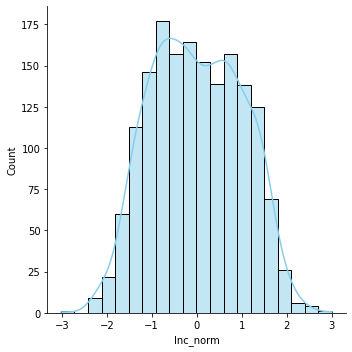

In [749]:
z_scaler.fit(pd.DataFrame(cleanData['Income']))
cleanData['Inc_norm'] = z_scaler.transform(pd.DataFrame(cleanData['Income']))
print(cleanData['Inc_norm'].head())
sns.displot(cleanData['Inc_norm'], bins=20, kde=True, color='skyblue')

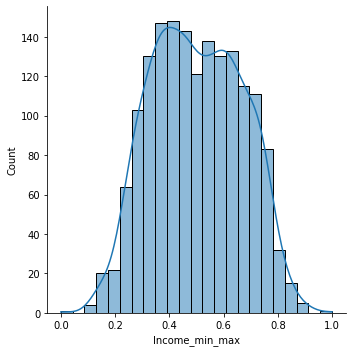

In [750]:
scaler.fit(pd.DataFrame(cleanData['Income']))
cleanData['Income_min_max'] = scaler.transform(pd.DataFrame(cleanData['Income']))
sns.displot(cleanData['Income_min_max'],kde=True)

Income Done! starting year of birth

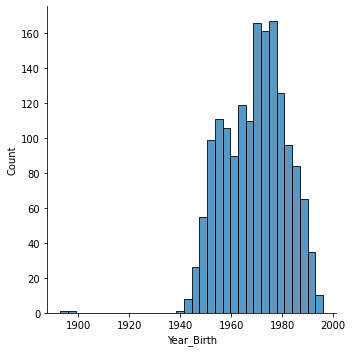

In [751]:
sns.displot(cleanData['Year_Birth'])

notice the outliers, let's see who they are

In [752]:
cleanData[cleanData['Year_Birth']<1940]

,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response,Inc_norm,Income_min_max
1184,1150,1899.0,PhD,Together,83532.0,0.0,0.0,26/09/2013,36,755.0,...,0.0,1.0,0.0,0.0,0.0,3.0,11.0,0,1.553928,0.758600
1217,11004,1893.0,2n Cycle,Single,60182.0,0.0,1.0,17/05/2014,23,8.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,0.428407,0.571967


There are 2 outliers. Quick claculation between the registration date and their birth year puts them at ages of 114 and 122.
Although it's possible, since we believe in not scamming the elderly into buying products we'll leave these people out.
Fun fact according to a quick google search the oldest person ever lived to 122.

In [753]:
cleanData = cleanData.drop([1184,1217])
cleanData[cleanData['Year_Birth']<1940]

,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response,Inc_norm,Income_min_max


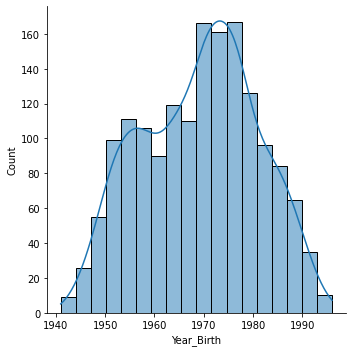

In [754]:
sns.displot(cleanData['Year_Birth'],kde=True)

Now let's look at missing data

In [755]:
cleanData[cleanData['Year_Birth'].isnull()]

,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response,Inc_norm,Income_min_max
204,9204,NaN,Graduation,Widow,66731.000000,0.0,1.0,12/09/2012,33,371.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,0.744083,0.624312
211,702,NaN,2n Cycle,Widow,47682.000000,0.0,1.0,15/02/2013,80,162.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,-0.174120,0.472057
335,9336,NaN,PhD,Widow,62187.000000,0.0,1.0,22/03/2014,38,512.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,0.525053,0.587993
346,6379,NaN,Master,Widow,47570.000000,1.0,1.0,29/05/2013,3,67.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,1,-0.179518,0.471162
465,6878,NaN,Graduation,Widow,27421.000000,0.0,0.0,12/12/2012,14,43.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,-1.150744,0.310114
484,8842,NaN,Graduation,Widow,30372.000000,1.0,1.0,25/12/2012,33,15.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,-1.008499,0.333701
502,5985,NaN,NaN,Married,30463.982898,NaN,NaN,13/10/2012,0,80.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,-1.004065,0.334436
509,9699,NaN,NaN,Married,38700.841900,NaN,NaN,21/12/2013,12,357.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,-0.607031,0.400272
630,8594,NaN,PhD,Widow,50520.000000,0.0,1.0,28/01/2014,25,112.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,-0.037322,0.494740
634,2587,NaN,NaN,Married,47443.007408,NaN,NaN,15/05/2014,21,14.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,-0.185640,0.470147


Since we have a nice distribution after removing the 2 outliers we can fill in the missing data according to the distribution

In [756]:
mu = cleanData['Year_Birth'].mean()
sigma = cleanData['Year_Birth'].std()

In [757]:
cleanData[cleanData['Year_Birth'].isna()].index

Int64Index([ 204,  211,  335,  346,  465,  484,  502,  509,  630,  634,  777,
             838,  840,  933,  936,  945, 1144, 1151, 1153, 1235, 1236, 1358,
            1439, 1464, 1502, 1522, 1564, 1568, 1639],
           dtype='int64')

In [758]:
for row in cleanData[cleanData['Year_Birth'].isna()].index:
    cleanData['Year_Birth'][row] = np.random.normal(mu, sigma)
cleanData[cleanData['Year_Birth'].isnull()]

C:\Users\obaro\AppData\Local\Temp\ipykernel_15888\466152874.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanData['Year_Birth'][row] = np.random.normal(mu, sigma)


,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response,Inc_norm,Income_min_max


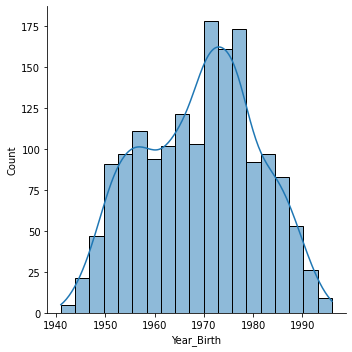

In [759]:
sns.displot(cleanData['Year_Birth'],kde=True)

During other tests we noticed that some year of births aren't whole numbers. Let's change that

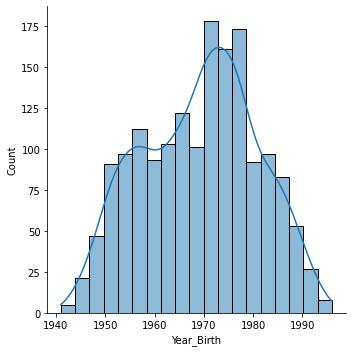

In [760]:
cleanData['Year_Birth'] = cleanData['Year_Birth'].astype(np.int64)
sns.displot(cleanData['Year_Birth'],kde=True)

Year of Birth done! starting status

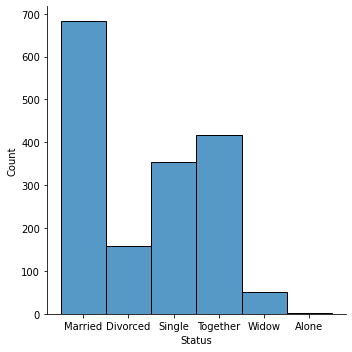

In [761]:
sns.displot(cleanData['Status'])

Alone is the same as single so we merge them

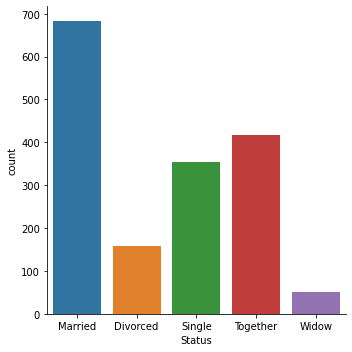

In [762]:

cleanData['Status'] = cleanData['Status'].replace('Alone','Single')
sns.catplot(x = 'Status', kind = 'count', data = cleanData)

34 rows of NaN in Status. That's a lot so we won't drop them

In [763]:
cleanData[cleanData['Status'].isnull()]

,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response,Inc_norm,Income_min_max


Convert Status to numerical

In [764]:
cleanData['Status_cat'] = cleanData['Status'].astype('category').cat.codes

Noticed later that Nan were mapped to -1

In [765]:
cleanData.groupby(['Status','Status_cat']).size()

Status    Status_cat
Divorced  0             158
Married   1             683
Single    2             355
Together  3             416
Widow     4              52
dtype: int64

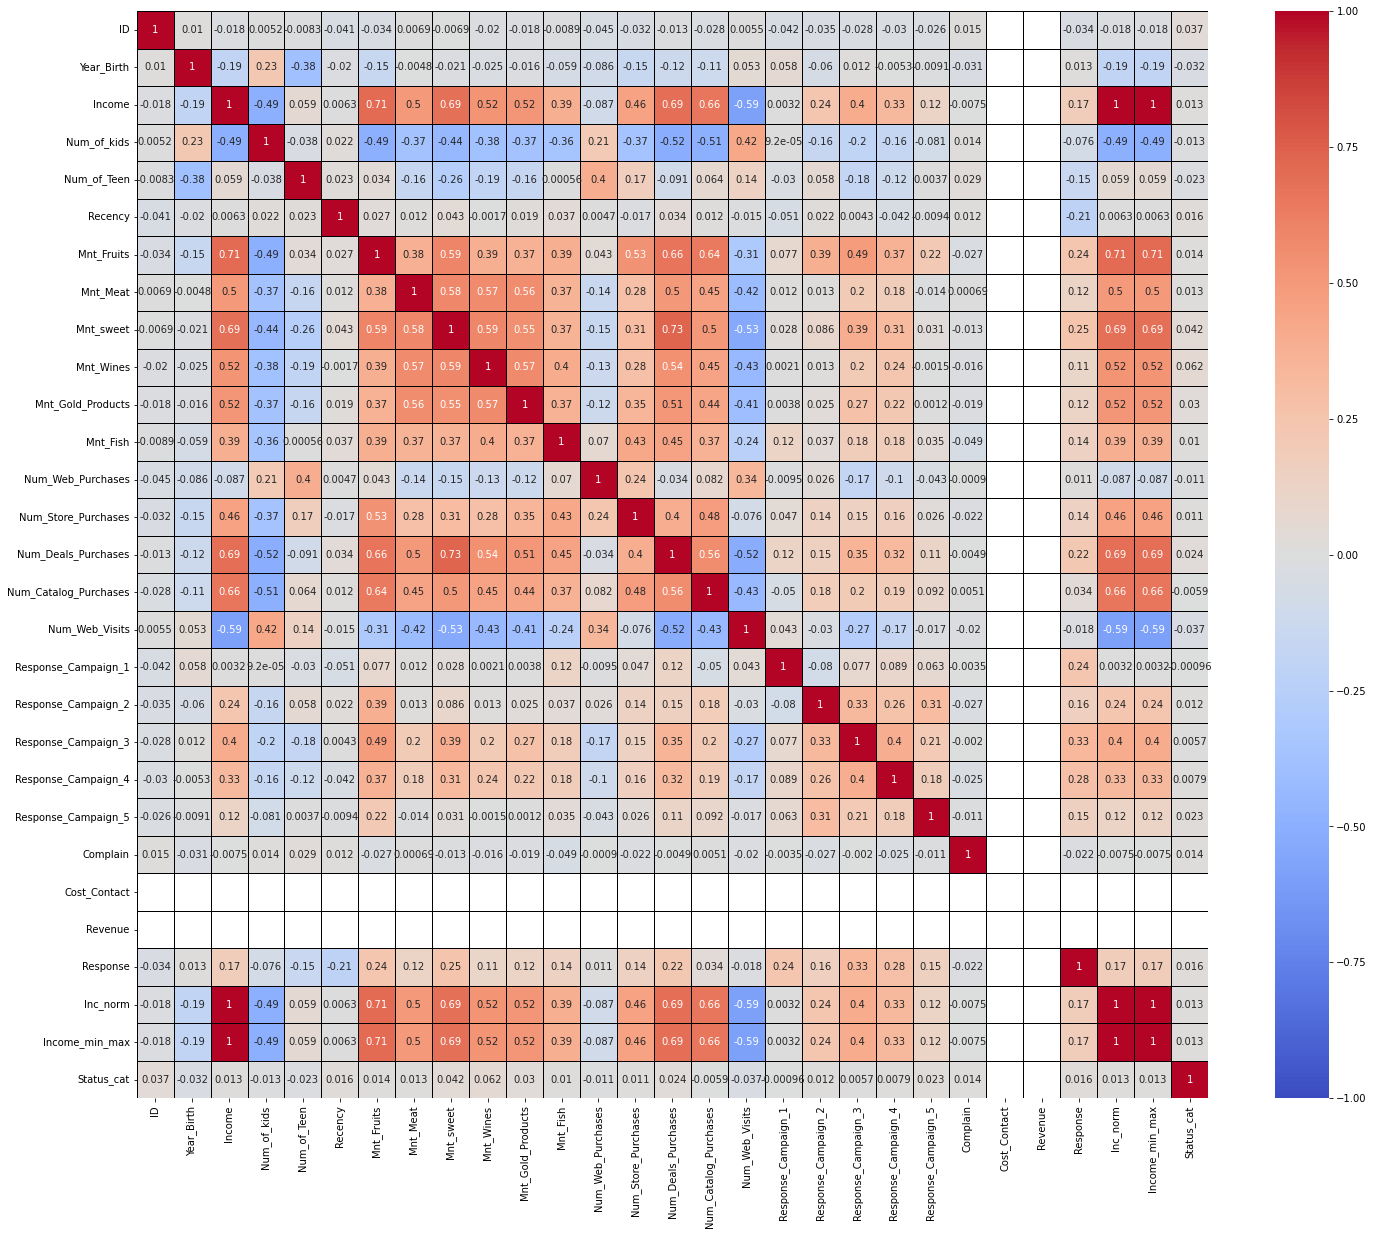

In [766]:
f, ax = plt.subplots(figsize=(24, 20))
ax = sns.heatmap(cleanData.corr(), annot = True, vmin=-1, vmax=1, center= 0,
            cmap= 'coolwarm', linewidths=0.5, linecolor='black')

Sadly doesn't look like Status has a strong correlation with anything (Largest number is 0.06).
Therefor instead of using correlation to devide we'll only generate values from a similar distribution

In [767]:
mu = cleanData['Status_cat'].mean()
sigma = cleanData['Status_cat'].std()
for row in cleanData[cleanData['Status_cat']==-1].index:
    #using abs to avoid negative numbers
    cleanData['Status_cat'][row] = abs(np.random.normal(mu, sigma))
#to avoid non whole numbers we'll turn Status_cat into int64
cleanData['Status_cat'] = cleanData['Status_cat'].astype(np.int64)
cleanData[cleanData['Status_cat']==-1]

,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response,Inc_norm,Income_min_max,Status_cat


1    683
3    416
2    355
0    158
4     52
Name: Status_cat, dtype: int64 
 Married     683
Together    416
Single      355
Divorced    158
Widow        52
Name: Status, dtype: int64


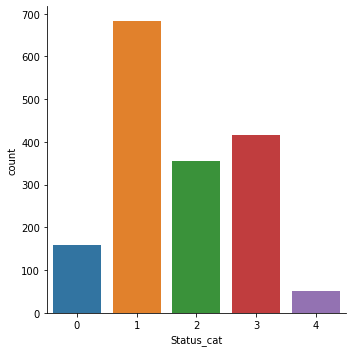

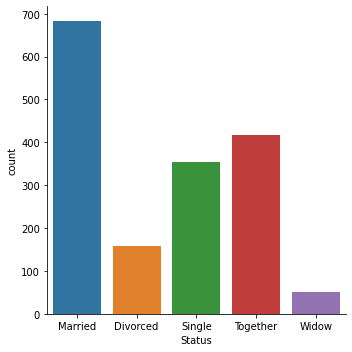

In [768]:
sns.catplot(x = 'Status_cat', kind = 'count', data = cleanData)
sns.catplot(x = 'Status', kind = 'count', data = cleanData)
print(cleanData['Status_cat'].value_counts(),'\n',cleanData['Status'].value_counts())


Changing Status according to Status_cat

In [769]:
for row in cleanData[cleanData['Status'].isna()].index:
    stat = cleanData['Status_cat'][row]
    if stat == 0:
        cleanData['Status'][row] = 'Divorced'
    if stat == 1:
        cleanData['Status'][row] = 'Married'
    if stat == 2:
        cleanData['Status'][row] = 'Single'
    if stat == 3:
        cleanData['Status'][row] = 'Together'
    if stat == 4:
        cleanData['Status'][row] = 'Widow'

In [770]:
cleanData[cleanData['Status'].isna()]

,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response,Inc_norm,Income_min_max,Status_cat


Status done! next is Num_Web_Purchases

In [771]:
cleanData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1664 entries, 0 to 1679
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     1664 non-null   int64  
 1   Year_Birth             1664 non-null   int64  
 2   Education              1656 non-null   object 
 3   Status                 1664 non-null   object 
 4   Income                 1664 non-null   float64
 5   Num_of_kids            1656 non-null   float64
 6   Num_of_Teen            1644 non-null   float64
 7   Registration_date      1664 non-null   object 
 8   Recency                1664 non-null   int64  
 9   Mnt_Fruits             1664 non-null   float64
 10  Mnt_Meat               1664 non-null   float64
 11  Mnt_sweet              1650 non-null   float64
 12  Mnt_Wines              1664 non-null   float64
 13  Mnt_Gold_Products      1664 non-null   float64
 14  Mnt_Fish               1664 non-null   float64
 15  Num_

[15. 13. 12. 11. 10.  9.  8.  7.  6.  5.  4.  3.  2.  1.  0. nan]


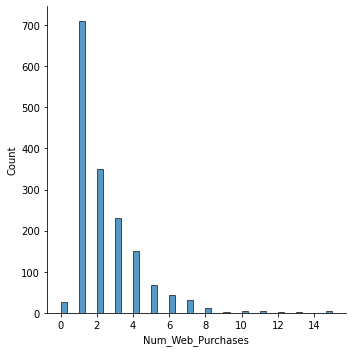

In [772]:
print(cleanData['Num_Web_Purchases'].unique())
sns.displot(cleanData['Num_Web_Purchases'])

There are 22 rows with missing Num_Web_Purchases (matches what we saw in info)

In [773]:
cleanData[cleanData['Num_Web_Purchases'].isna()]

,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response,Inc_norm,Income_min_max,Status_cat
1651,4119,1963,Master,Together,38620.000000,0.0,0.0,11/05/2013,56,112.0,...,0.0,0.0,0.0,0.0,3.0,11.0,0,-0.610928,0.399626,3
1652,9743,1955,Graduation,Married,76998.000000,0.0,1.0,11/01/2013,85,1449.0,...,1.0,0.0,0.0,0.0,3.0,11.0,0,1.238975,0.706375,1
1653,5300,1973,Master,Married,38961.000000,1.0,0.0,30/12/2013,60,19.0,...,0.0,0.0,0.0,0.0,3.0,11.0,0,-0.594491,0.402351,1
1654,851,1972,Master,Married,57136.000000,1.0,1.0,09/07/2013,48,306.0,...,0.0,0.0,0.0,0.0,3.0,11.0,0,0.281584,0.547621,1
1655,569,1991,Graduation,Single,90273.000000,0.0,0.0,14/12/2013,32,704.0,...,1.0,1.0,0.0,0.0,3.0,11.0,1,1.878859,0.812480,2
1656,7712,1946,PhD,Single,62159.000000,0.0,0.0,28/04/2014,68,182.0,...,0.0,0.0,0.0,0.0,3.0,11.0,0,0.523703,0.587769,2
1657,8093,1969,Master,Married,79734.000000,0.0,0.0,28/06/2014,72,572.0,...,0.0,1.0,0.0,0.0,3.0,11.0,0,1.370856,0.728243,1
1658,5117,1963,2n Cycle,Married,32632.000000,0.0,0.0,02/08/2012,32,63.0,...,0.0,0.0,0.0,0.0,3.0,11.0,0,-0.899562,0.351765,1
1660,1291,1978,PhD,Together,27683.000000,1.0,0.0,04/08/2012,90,152.0,...,0.0,0.0,0.0,0.0,3.0,11.0,0,-1.138115,0.312208,3
1661,7723,1979,Graduation,Together,75507.000000,0.0,0.0,02/05/2014,56,709.0,...,0.0,0.0,0.0,0.0,3.0,11.0,0,1.167106,0.694458,3


Looking back at the correlations. Num_Web_Purchases has a high correlation with Num_of_Teen (which doesn't seem to have a clear reason)
and Num_Web_Visits (a more reasonable connection).

The problem is that there are too many options for number of web visits. We need to group them together into categories: (0 - 10, 10-20,20-30,30-40,40+)

In [774]:
cleanData.loc[(cleanData['Num_Web_Visits']  > 0) & (cleanData['Num_Web_Visits'] <= 10), 'Web_Visits_Range'] = 0
cleanData.loc[(cleanData['Num_Web_Visits'] > 10) & (cleanData['Num_Web_Visits'] <= 20), 'Web_Visits_Range'] = 1
cleanData.loc[(cleanData['Num_Web_Visits'] > 20) & (cleanData['Num_Web_Visits'] <= 30), 'Web_Visits_Range'] = 2
cleanData.loc[(cleanData['Num_Web_Visits'] > 30) & (cleanData['Num_Web_Visits'] <= 40), 'Web_Visits_Range'] = 3
cleanData.loc[ cleanData['Num_Web_Visits'] > 40, 'Web_Visits_Range'] = 4

In [775]:
cleanData['Web_Visits_Range'].value_counts()

1.0    865
0.0    763
3.0      6
2.0      2
Name: Web_Visits_Range, dtype: int64

In [776]:
cleanData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1664 entries, 0 to 1679
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     1664 non-null   int64  
 1   Year_Birth             1664 non-null   int64  
 2   Education              1656 non-null   object 
 3   Status                 1664 non-null   object 
 4   Income                 1664 non-null   float64
 5   Num_of_kids            1656 non-null   float64
 6   Num_of_Teen            1644 non-null   float64
 7   Registration_date      1664 non-null   object 
 8   Recency                1664 non-null   int64  
 9   Mnt_Fruits             1664 non-null   float64
 10  Mnt_Meat               1664 non-null   float64
 11  Mnt_sweet              1650 non-null   float64
 12  Mnt_Wines              1664 non-null   float64
 13  Mnt_Gold_Products      1664 non-null   float64
 14  Mnt_Fish               1664 non-null   float64
 15  Num_

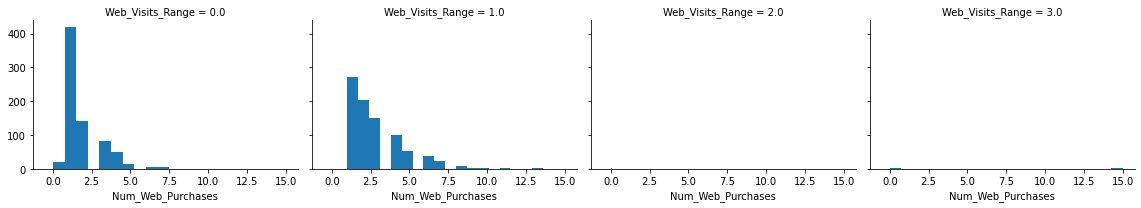

In [777]:
g = sns.FacetGrid(cleanData, col='Web_Visits_Range', height=3, aspect= 1.33)
g.map(plt.hist, 'Num_Web_Purchases', bins=20)

In [778]:
for i in cleanData['Web_Visits_Range'].unique(): 
    cleanData['Num_Web_Purchases'][cleanData['Web_Visits_Range']==i].median()
    print('For range ', i, ' the median is ', cleanData.loc[cleanData['Web_Visits_Range']==i , 'Num_Web_Purchases'].median())
    print('and the number of missing values is ', cleanData.loc[cleanData['Web_Visits_Range']==i , 'Num_Web_Purchases'].isnull().sum(), 
          'out of ',(cleanData['Web_Visits_Range']==i).sum(), 'rows')

For range  0.0  the median is  1.0
and the number of missing values is  19 out of  763 rows
For range  3.0  the median is  8.0
and the number of missing values is  0 out of  6 rows
For range  1.0  the median is  2.0
and the number of missing values is  3 out of  865 rows
For range  nan  the median is  nan
and the number of missing values is  0 out of  0 rows
For range  2.0  the median is  0.0
and the number of missing values is  0 out of  2 rows


Since there are only 3 Nan values in the range 10-20 we'll replace them with the median. For range 0-10 there are 19 Nan this is close to 2.5% so we'll generate from similar distribution.

In [779]:
cleanData.loc[cleanData['Web_Visits_Range']==1 , 'Num_Web_Purchases'] = cleanData['Num_Web_Purchases'][cleanData['Web_Visits_Range']==1].fillna(value=cleanData['Num_Web_Purchases'][cleanData['Web_Visits_Range']==1].median())

In [780]:
cleanData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1664 entries, 0 to 1679
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     1664 non-null   int64  
 1   Year_Birth             1664 non-null   int64  
 2   Education              1656 non-null   object 
 3   Status                 1664 non-null   object 
 4   Income                 1664 non-null   float64
 5   Num_of_kids            1656 non-null   float64
 6   Num_of_Teen            1644 non-null   float64
 7   Registration_date      1664 non-null   object 
 8   Recency                1664 non-null   int64  
 9   Mnt_Fruits             1664 non-null   float64
 10  Mnt_Meat               1664 non-null   float64
 11  Mnt_sweet              1650 non-null   float64
 12  Mnt_Wines              1664 non-null   float64
 13  Mnt_Gold_Products      1664 non-null   float64
 14  Mnt_Fish               1664 non-null   float64
 15  Num_

In [781]:
print('For range 10-20 the median is ', cleanData.loc[cleanData['Web_Visits_Range']==1 , 'Num_Web_Purchases'].median())
print('and the number of missing values is ', cleanData.loc[cleanData['Web_Visits_Range']==1 , 'Num_Web_Purchases'].isnull().sum(), 
          'out of ',(cleanData['Web_Visits_Range']==1).sum(), 'rows')

For range 10-20 the median is  2.0
and the number of missing values is  0 out of  865 rows


In [782]:
missing_values = cleanData.loc[cleanData['Web_Visits_Range']==0][cleanData.loc[cleanData['Web_Visits_Range']==0 , 'Num_Web_Purchases'].isnull()]


Check for wierd floats

In [797]:
mu = cleanData.loc[cleanData['Web_Visits_Range']==0 , 'Num_Web_Purchases'].mean()
sigma = cleanData.loc[cleanData['Web_Visits_Range']==0 , 'Num_Web_Purchases'].std()
for row in cleanData.loc[cleanData['Web_Visits_Range']==0][cleanData.loc[cleanData['Web_Visits_Range']==0 , 'Num_Web_Purchases'].isnull()].index:
    cleanData.loc[row] = abs(np.random.normal(mu, sigma))
cleanData['Num_Web_Purchases'] = cleanData['Num_Web_Purchases'].astype(np.int64)

In [798]:
cleanData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1664 entries, 0 to 1679
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     1664 non-null   float64
 1   Year_Birth             1664 non-null   float64
 2   Education              1656 non-null   object 
 3   Status                 1664 non-null   object 
 4   Income                 1664 non-null   float64
 5   Num_of_kids            1656 non-null   float64
 6   Num_of_Teen            1644 non-null   float64
 7   Registration_date      1664 non-null   object 
 8   Recency                1664 non-null   float64
 9   Mnt_Fruits             1664 non-null   float64
 10  Mnt_Meat               1664 non-null   float64
 11  Mnt_sweet              1650 non-null   float64
 12  Mnt_Wines              1664 non-null   float64
 13  Mnt_Gold_Products      1664 non-null   float64
 14  Mnt_Fish               1664 non-null   float64
 15  Num_

In [784]:
cleanData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1664 entries, 0 to 1679
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     1664 non-null   int64  
 1   Year_Birth             1664 non-null   int64  
 2   Education              1656 non-null   object 
 3   Status                 1664 non-null   object 
 4   Income                 1664 non-null   float64
 5   Num_of_kids            1656 non-null   float64
 6   Num_of_Teen            1644 non-null   float64
 7   Registration_date      1664 non-null   object 
 8   Recency                1664 non-null   int64  
 9   Mnt_Fruits             1664 non-null   float64
 10  Mnt_Meat               1664 non-null   float64
 11  Mnt_sweet              1650 non-null   float64
 12  Mnt_Wines              1664 non-null   float64
 13  Mnt_Gold_Products      1664 non-null   float64
 14  Mnt_Fish               1664 non-null   float64
 15  Num_

In [785]:
cleanData[cleanData['Num_Web_Purchases'].isna()]

,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response,Inc_norm,Income_min_max,Status_cat,Web_Visits_Range
1651,4119,1963,Master,Together,38620.000000,0.0,0.0,11/05/2013,56,112.0,...,0.0,0.0,0.0,3.0,11.0,0,-0.610928,0.399626,3,0.0
1655,569,1991,Graduation,Single,90273.000000,0.0,0.0,14/12/2013,32,704.0,...,1.0,0.0,0.0,3.0,11.0,1,1.878859,0.812480,2,0.0
1656,7712,1946,PhD,Single,62159.000000,0.0,0.0,28/04/2014,68,182.0,...,0.0,0.0,0.0,3.0,11.0,0,0.523703,0.587769,2,0.0
1657,8093,1969,Master,Married,79734.000000,0.0,0.0,28/06/2014,72,572.0,...,1.0,0.0,0.0,3.0,11.0,0,1.370856,0.728243,1,0.0
1658,5117,1963,2n Cycle,Married,32632.000000,0.0,0.0,02/08/2012,32,63.0,...,0.0,0.0,0.0,3.0,11.0,0,-0.899562,0.351765,1,0.0
1660,1291,1978,PhD,Together,27683.000000,1.0,0.0,04/08/2012,90,152.0,...,0.0,0.0,0.0,3.0,11.0,0,-1.138115,0.312208,3,0.0
1661,7723,1979,Graduation,Together,75507.000000,0.0,0.0,02/05/2014,56,709.0,...,0.0,0.0,0.0,3.0,11.0,0,1.167106,0.694458,3,0.0
1664,5680,1984,2n Cycle,Married,35684.000000,1.0,0.0,22/04/2014,66,10.0,...,0.0,0.0,0.0,3.0,11.0,0,-0.752449,0.376159,1,0.0
1667,7441,1973,Graduation,Divorced,71128.000000,1.0,0.0,06/10/2012,80,958.0,...,0.0,0.0,0.0,3.0,11.0,0,0.956028,0.659457,0,0.0
1668,3421,1968,Master,Divorced,63841.000000,0.0,1.0,21/04/2013,64,635.0,...,0.0,0.0,0.0,3.0,11.0,0,0.604779,0.601213,0,0.0


In [786]:
print(cleanData[cleanData['Education'].isnull()].isnull().sum(axis=1))

502     3
509     3
634     3
936     3
1151    3
1464    3
1502    3
1639    3
dtype: int64


In [787]:
#cleanData = cleanData.drop(cleanData[cleanData['Education'].isnull()].index,axis=0)

['Widow' 'Married' 'Divorced' 'Single' 'Together']


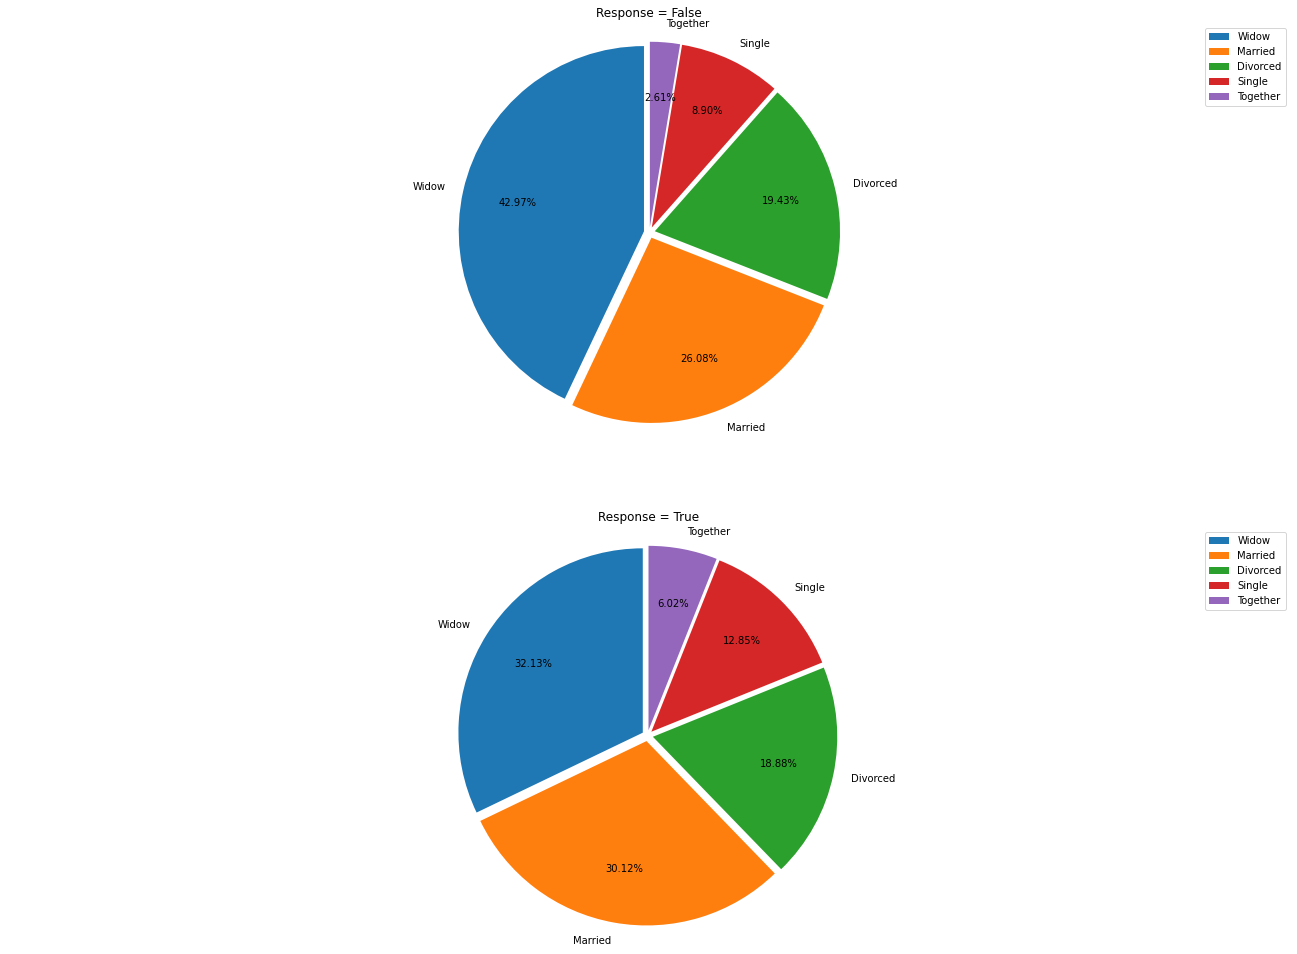

In [788]:
target = cleanData['Status'][cleanData['Response']==True].unique()
print(target)
fig1,(ax1,ax2) = plt.subplots(2,1,figsize=(23,17))
ax1.pie(cleanData['Status'][cleanData['Response']==False].value_counts(), labels=target, labeldistance=1.1, pctdistance=0.7, autopct='%0.2f%%', shadow=False, startangle=90,explode=[0.03,0.03,0.03,0.03,0.03])
ax1.axis('equal') 
ax1.set_title('Response = False')
fig1.set_facecolor('white')
target = cleanData['Status'][cleanData['Response']==True].unique()
ax2.pie(cleanData['Status'][cleanData['Response']==True].value_counts(), labels=target, labeldistance=1.1, pctdistance=0.7, autopct='%0.2f%%', shadow=False, startangle=90,explode=[0.03,0.03,0.03,0.03,0.03])
ax2.axis('equal')
ax2.set_title('Response = True')
ax1.legend()
ax2.legend()
plt.show()